In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from tensorflow.keras.models import Model
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

In [36]:
# Load the dataset
dataset_path = r"C:\Human Action Recognition\train" 
train_file = r"C:\Human Action Recognition\Training_set.csv" # not using the test csv because it does not contains labels

In [37]:
# Read the train file
train_df = pd.read_csv(train_file, sep=',', header=None, names=['filename', 'label'])

In [38]:
# separating the train data into two parts training and testing
train_df, test_df = train_test_split(train_df, test_size=0.2, random_state=42)
test_df

,filename,label
4058,Image_4058.jpg,hugging
1399,Image_1399.jpg,eating
2034,Image_2034.jpg,sitting
3528,Image_3528.jpg,listening_to_music
7383,Image_7383.jpg,hugging
...,...,...
8057,Image_8057.jpg,cycling
12163,Image_12163.jpg,sitting
2108,Image_2108.jpg,hugging
4100,Image_4100.jpg,running


In [39]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

batch_size=32
img_height = 224
img_width = 224
classes = ["sitting","using laptop","hugging",
           "sleeping","drinking","clapping","dancing",
           "cycling","calling","laughing","eating","fighting",
           "listening_to_music","running","texting"
          ]

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory = dataset_path,
    x_col = 'filename',
    y_col = 'label',
    target_size = (img_height,img_width),
    batch_size = batch_size,
    class_mode = 'categorical',
    classes = classes,
    shuffle = True,
    seed = 42
)
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=dataset_path,
    x_col = 'filename',
    y_col = 'label',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode = 'categorical',
    classes = classes,
    shuffle = False
)

Found 9404 validated image filenames belonging to 15 classes.
Found 2356 validated image filenames belonging to 15 classes.


C:\Users\pk boss\anaconda3\lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


In [40]:
# Load the VGG-16 model with pre-trained ImageNet weights
from keras.application import VGG16
vgg16_base = VGG16(weights='imagenet', 
                   include_top=False, 
                   input_shape=(img_height, img_width, 3))

# Freeze the VGG16 base layers to use their weights
for layer in vgg16_base.layers:
    layer.trainable = False
    
flatten_layer = Flatten()(vgg16_base.output)
dense_layer = Dense(256, activation = 'relu')(flatten_layer)
output_layer = Dense(15, activation = 'softmax')(dense_layer)

vgg_model = Model(inputs = vgg16_base.input, outputs = output_layer)

# Train the model
epochs = 10
steps_per_epoch = len(train_generator)
validation_steps = len(test_generator)

history = vgg_model.fit(train_generator,
                    epochs=epochs,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=test_generator,
                    validation_steps=validation_steps,
                    callbacks=[early_stopping])

In [41]:
vgg16_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [42]:
# Freeze the VGG16 base layers to use their weights
for layer in vgg16_base.layers:
    layer.trainable = False

In [43]:
vgg16_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [44]:
flatten_layer = Flatten()(vgg16_base.output)
dense_layer = Dense(256, activation = 'relu')(flatten_layer)
output_layer = Dense(15, activation = 'softmax')(dense_layer)

In [45]:
vgg_model = Model(inputs = vgg16_base.input, outputs = output_layer)

In [46]:
vgg_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [47]:
# Compile the model
vgg_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
# Create EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True)

In [49]:
# Train the model
epochs = 10
steps_per_epoch = len(train_generator)
validation_steps = len(test_generator)

history = vgg_model.fit(train_generator,
                    epochs=epochs,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=test_generator,
                    validation_steps=validation_steps,
                    callbacks=[early_stopping])

Epoch 1/10
294/294 [==============================] - 1297s 4s/step - loss: 1.9756 - accuracy: 0.4061 - val_loss: 1.4685 - val_accuracy: 0.5166
Epoch 2/10
294/294 [==============================] - 1323s 5s/step - loss: 1.3681 - accuracy: 0.5556 - val_loss: 1.3743 - val_accuracy: 0.5446
Epoch 3/10
294/294 [==============================] - 1353s 5s/step - loss: 1.1933 - accuracy: 0.6114 - val_loss: 1.4811 - val_accuracy: 0.5365
Epoch 4/10
294/294 [==============================] - 1305s 4s/step - loss: 1.0431 - accuracy: 0.6621 - val_loss: 1.3747 - val_accuracy: 0.5620
Epoch 5/10
294/294 [==============================] - 1304s 4s/step - loss: 0.9457 - accuracy: 0.6912 - val_loss: 1.4030 - val_accuracy: 0.5586


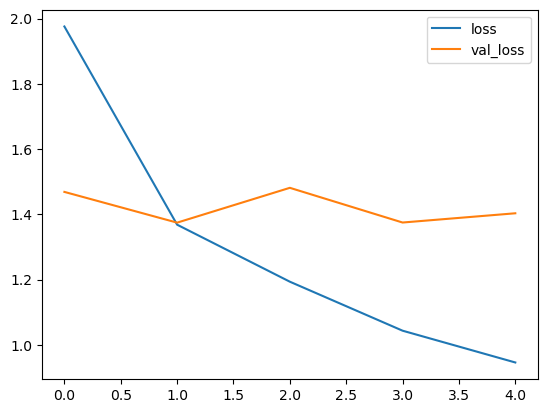

In [50]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

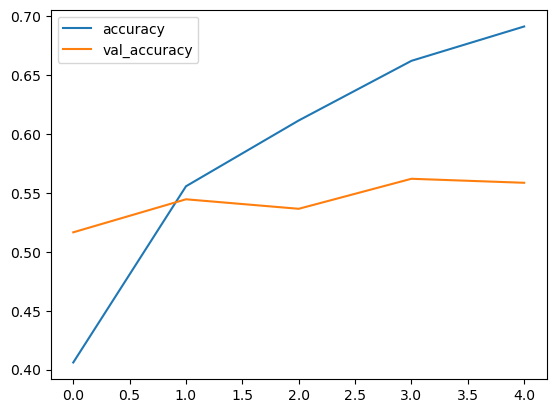

In [51]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

In [52]:
vgg_model.save("VGG16_model.h5")

C:\Users\pk boss\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
